In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle as pl
from scipy.stats import norm
from scipy.stats import gamma
from chainconsumer import ChainConsumer

In [2]:
data = np.loadtxt('xi_measurement.dat')

In [3]:
theta = data[:, 0]
xi = data[:, 1]
err = data[:, 2]

sigma = 1.5   # try sigma = 20 and the the difference in question D 
C = sigma**2 * np.eye(20)


# Repeat figures in slides

In [4]:
intervals = 10000
A = np.linspace(0, 4, intervals+1)
dA = 4/intervals

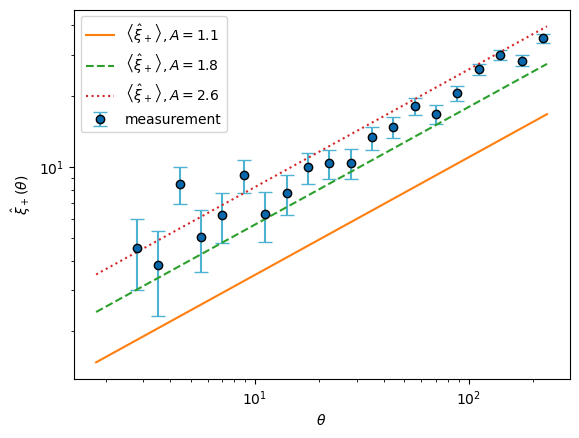

In [65]:
theta_range = np.linspace(np.min(theta)-1, np.max(theta)+10, 1001)

# plt.figure(figsize = (12, 8))


plt.errorbar(theta, xi, yerr=err, fmt='o', mfc='#0868ac', mec='black', ecolor='#4eb3d3', capsize=5, label = "measurement")
plt.plot(theta_range, 1.1 * theta_range**0.5, label = r"$\left< \hat{\xi}_+ \right> , A=1.1$")
plt.plot(theta_range, 1.8 * theta_range**0.5, label = r"$\left< \hat{\xi}_+ \right> , A=1.8$", linestyle = "dashed")
plt.plot(theta_range, 2.6 * theta_range**0.5, label = r"$\left< \hat{\xi}_+ \right> , A=2.6$", linestyle = "dotted")




plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\hat{\xi}_+\left( \theta \right)  $')
plt.xscale('log')
plt.yscale('log')

# plt.xlim(np.min(theta)-1, np.max(theta))

# plt.xlim(0, 20)
# plt.ylim(0, 7)

plt.legend()

In [6]:
likelihood = np.array([1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - a * theta**0.5).T @ np.linalg.inv(C) @ (xi - a*theta**0.5)) for a in A])
posterior_A = likelihood * 0.25 * np.ones_like(A)

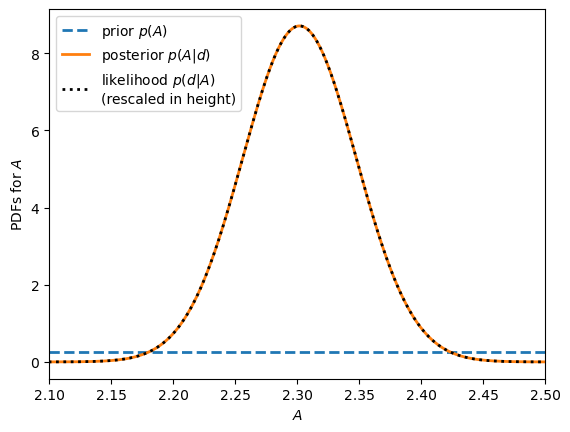

In [66]:
# plt.figure(figsize=(15,8))



plt.plot(A, 0.25*np.ones_like(A), label = "prior $p(A)$", linestyle = "dashed", lw = 2)


plt.plot(A, posterior_A/(np.sum(posterior_A))/dA, alpha = 1.0, label = r"posterior $p(A|d )$", lw=2)
plt.plot(A, likelihood/(np.sum(likelihood))/dA, color = "black", linestyle = "dotted", label = "likelihood $p(d|A)$ \n(rescaled in height)", lw=2)


plt.xlim(2.1, 2.5)
plt.xlabel(r'$A$')
plt.ylabel(r'PDFs for $A$')

plt.legend(loc = "upper left")




In [8]:
prior_Gaussian = norm.pdf(A, loc=2.4, scale=0.01)
posterior_Gaussian = prior_Gaussian * likelihood 

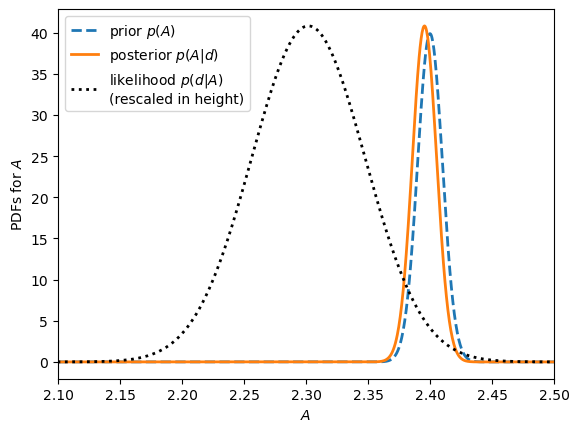

In [67]:
# plt.figure(figsize=(15, 8))

plt.plot(A, norm.pdf(A, loc=2.4, scale=0.01), linestyle='dashed', lw=2, label = "prior $p(A)$")
plt.plot(A, posterior_Gaussian/(np.sum(posterior_Gaussian))/dA, label =  r"posterior $p(A|d )$", lw=2)
plt.plot(A, likelihood/(np.sum(likelihood))/dA/(np.max(likelihood/(np.sum(likelihood))/dA))*np.max(posterior_Gaussian/(np.sum(posterior_Gaussian))/dA), color = "black", linestyle = "dotted", label = "likelihood $p(d|A)$ \n(rescaled in height)", lw=2)


plt.xlim(2.1, 2.5)
plt.xlabel(r'$A$')
plt.ylabel(r'PDFs for $A$')

# plt.legend(loc = "upper left")
plt.legend()


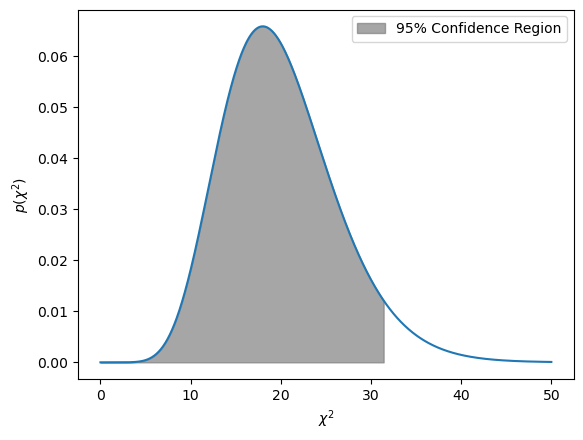

In [10]:
chi_2_A = (xi - 1.1*theta**0.5).T @ np.linalg.inv(C) @ (xi - 1.1*theta**0.5)
chi_2_B = (xi - 1.8*theta**0.5).T @ np.linalg.inv(C) @ (xi - 1.8*theta**0.5)
chi_2_C = (xi - 2.6*theta**0.5).T @ np.linalg.inv(C) @ (xi - 2.6*theta**0.5)


N_data = len(xi)

chi_range = np.linspace(0, 50, 1001)
p_chi = gamma.pdf(chi_range, a = N_data/2, scale = 2)



plt.plot(chi_range, p_chi)

plt.fill_between(chi_range, p_chi, where=(chi_range <= gamma.ppf(0.95, a=N_data/2, scale = 2)), color='gray', alpha=0.7, label='95% Confidence Region')



plt.xlabel('$\chi^2$')
plt.ylabel('$p(\chi^2)$')

# plt.scatter(chi_2_A, 0, label="A")
plt.legend()


# Problem 1

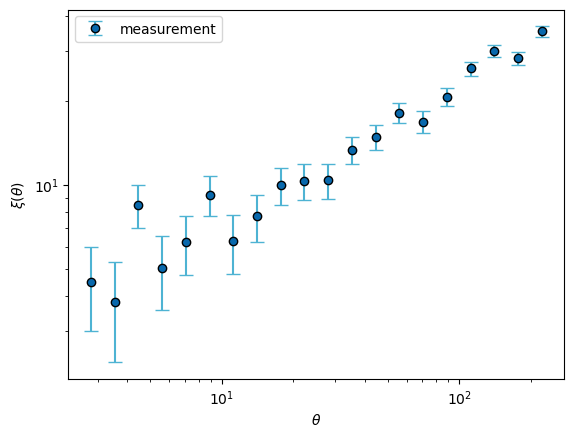

In [11]:
plt.errorbar(theta, xi, yerr=err, fmt='o', mfc='#0868ac', mec='black', ecolor='#4eb3d3', capsize=5, label = "measurement")
plt.xlabel(r'$ \theta $')
plt.ylabel(r'$\xi \left( \theta \right) $')
plt.xscale('log')
plt.yscale('log')

plt.legend()

### Question (A)

In [12]:
intervals = 10000
A = np.linspace(0, 4, intervals+1)
dA = 4/intervals


likelihood = np.array([1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - a * theta**0.5).T @ np.linalg.inv(C) @ (xi - a*theta**0.5)) for a in A])
posterior_A = likelihood * 0.25 * np.ones_like(A)


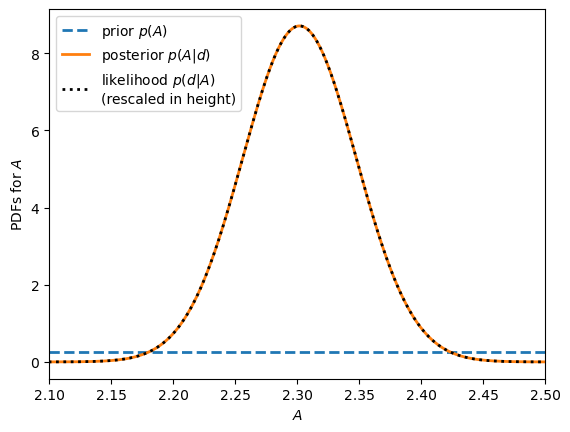

In [68]:
# plt.figure(figsize=(15,8))



plt.plot(A, 0.25*np.ones_like(A), label = "prior $p(A)$", linestyle = "dashed", lw = 2)


plt.plot(A, posterior_A/(np.sum(posterior_A))/dA, alpha = 1.0, label = r"posterior $p(A|d )$", lw=2)
plt.plot(A, likelihood/(np.sum(likelihood))/dA, color = "black", linestyle = "dotted", label = "likelihood $p(d|A)$ \n(rescaled in height)", lw=2)


plt.xlim(2.1, 2.5)
plt.xlabel(r'$A$')
plt.ylabel(r'PDFs for $A$')

plt.legend(loc = "upper left")


### Question (B)

In [14]:
def model_A_unvec(a):
    p = 1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - a * theta**0.5).T @ np.linalg.inv(C) @ (xi - a*theta**0.5))
    return p/np.sum(posterior_A)/dA*0.25
    
    
model_A = np.vectorize(model_A_unvec)


In [15]:
po_max = np.max(model_A(A))

In [16]:
y = np.linspace(0, po_max, 1001)[::-1]
i_max = np.where(model_A(A)==po_max)[0][0]

# for i, h in enumerate(y[:100]):
    
print(i_max)
    

5755


In [17]:
difference_l = np.abs(model_A(A[:i_max]) - (po_max - 0.05))
difference_r = np.abs(model_A(A[i_max:]) - (po_max - 0.05))
print(difference_l.shape)

print(np.where(difference_l == np.min(difference_l)))
print(np.where(difference_r == np.min(difference_r)))


(5755,)
(array([5742]),)
(array([12]),)


In [18]:
# for i, h in enumerate(y[::-1]):
#     difference_left = np.abs(model_A(A[:i_max]) - h)
#     difference_right = np.abs(model_A(A[i_max:]) - h)
#     index_left = np.where(difference_left == np.min(difference_left))[0][0]
#     index_right = np.where(difference_right == np.min(difference_right))[0][0] + i_max
#     area = np.sum(model_A(A[index_left:index_right])) * dA
#     if area <=0.954:
#         break
    

In [19]:
# print(index_left, index_right)   # for 68.3% confidence region, A[5640] and A[5870] are the end points
                                 # for 95.4% confidence region, A[5526] and A[5983] are the end points
                                 # for 99.7% confidence region, A[5417] and A[6092] are the end points

In [73]:
print(A[5417], A[6092])
print(A[5526], A[5983])
print(A[5640], A[5870])

2.1668000000000003 2.4368000000000003
2.2104 2.3932
2.2560000000000002 2.3480000000000003


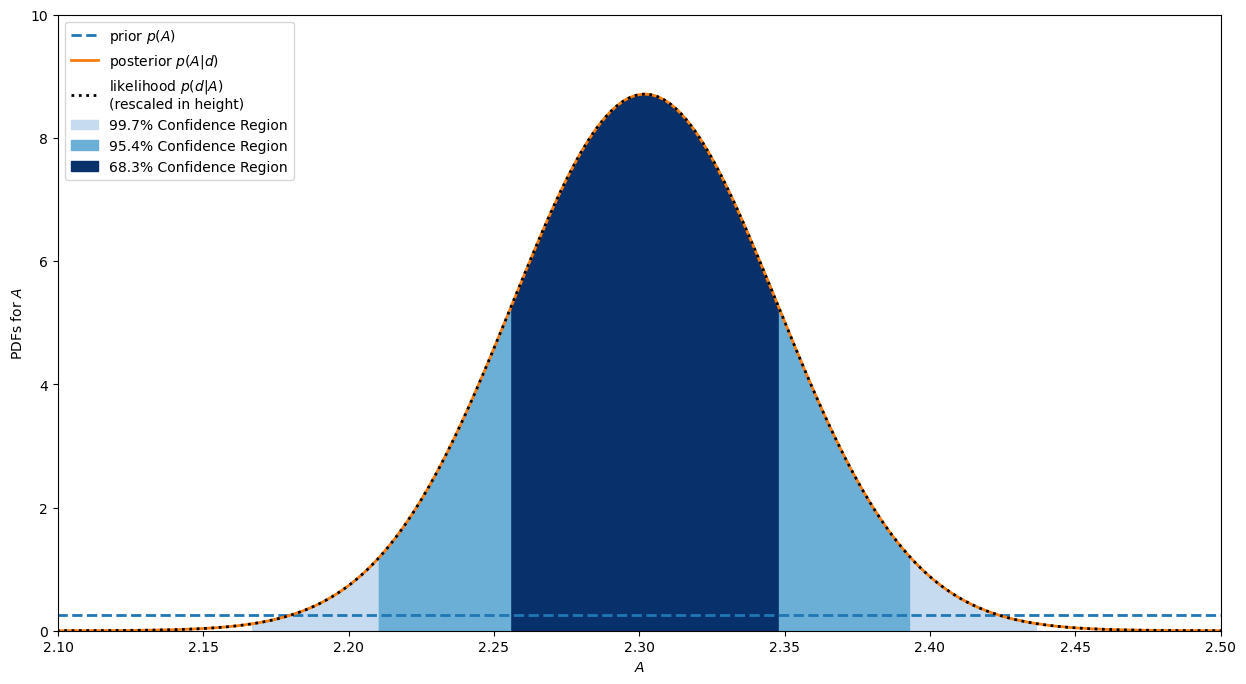

In [70]:
plt.figure(figsize=(15,8))

# plt.grid()

plt.plot(A, 0.25*np.ones_like(A), label = "prior $p(A)$", linestyle = "dashed", lw = 2)


plt.plot(A, posterior_A/(np.sum(posterior_A))/dA, alpha = 1.0, label = r"posterior $p(A|d )$", lw=2)
plt.plot(A, likelihood/(np.sum(likelihood))/dA, color = "black", linestyle = "dotted", label = "likelihood $p(d|A)$ \n(rescaled in height)", lw=2)


plt.fill_between(A[5417:6092], model_A(A[5417:6092]), color='#c6dbef', alpha=1.0, label='99.7% Confidence Region')
plt.fill_between(A[5526:5983], model_A(A[5526:5983]), color='#6baed6', alpha=1.0, label='95.4% Confidence Region')
plt.fill_between(A[5640:5870], model_A(A[5640:5870]), color='#08306b', alpha=1.0, label='68.3% Confidence Region')

# plt.fill_between(A[5417:6092], model_A(A[5417:6092]), color='#edf8b1', alpha=1.0, label='99.7% Confidence Region')
# plt.fill_between(A[5526:5983], model_A(A[5526:5983]), color='#41b6c4', alpha=1.0, label='95.4% Confidence Region')
# plt.fill_between(A[5640:5870], model_A(A[5640:5870]), color='#081d58', alpha=1.0, label='68.3% Confidence Region')


plt.xlim(2.1, 2.5)
plt.ylim(0, 10)
plt.xlabel(r'$A$')
plt.ylabel(r'PDFs for $A$')

plt.legend(loc = "upper left")



### Question (C)

In [21]:
interval_B = 1000
B = np.linspace(0, 2, interval_B+1)
dB = 2/interval_B

likelihood_C = np.array([1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - b**2 * theta**0.5).T @ np.linalg.inv(C) @ (xi - b**2 * theta**0.5)) for b in B])

posterior_C = 0.5*np.ones_like(B) * likelihood_C


(1.4, 1.6)

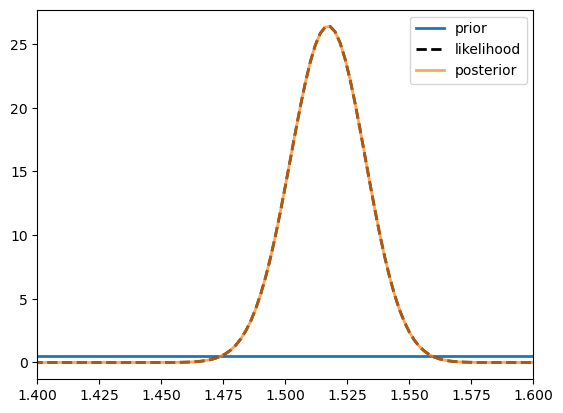

In [22]:
plt.plot(B, 0.5 * np.ones_like(B), label = "prior", lw=2)
plt.plot(B, likelihood_C/np.sum(likelihood_C)/dB, label = "likelihood", color = "black", linestyle = "dashed", lw=2)
plt.plot(B, posterior_C/np.sum(posterior_C)/dB, label = "posterior", lw=2, alpha = 0.7)

plt.legend()
plt.xlim(1.4, 1.6)


### Question (D)

In [23]:
A_D = np.linspace(0, 6, 10001)
dA_D = 6/10000


likelihood_C_double = np.array([1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - b*2 * theta**0.5).T @ np.linalg.inv(C) @ (xi - b*2 * theta**0.5)) for b in B])
likelihood_D = np.array([1/np.sqrt(2*np.pi*np.linalg.det(C)) * np.exp(-0.5 * (xi - a**0.5 * theta**0.5).T @ np.linalg.inv(C) @ (xi - a**0.5 * theta**0.5)) for a in A_D])

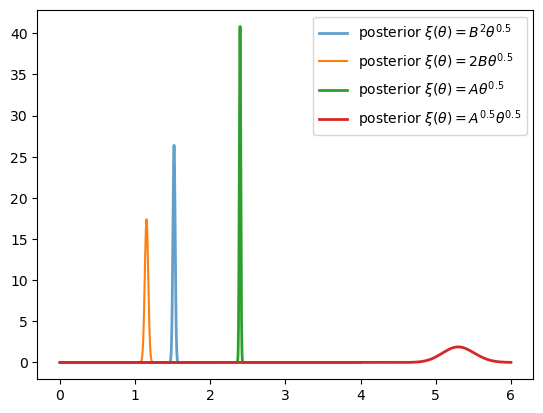

In [24]:

plt.plot(B, posterior_C/np.sum(posterior_C)/dB, label = r"posterior $\xi \left( \theta \right) =B^2\theta ^{0.5}$", lw=2, alpha = 0.7)
plt.plot(B, likelihood_C_double/np.sum(likelihood_C_double)/dB, label = r"posterior $\xi \left( \theta \right) =2B\theta ^{0.5}$")
plt.plot(A, posterior_Gaussian/(np.sum(posterior_Gaussian))/dA, label =  r"posterior $\xi \left( \theta \right) =A\theta ^{0.5}$", lw=2)
plt.plot(A_D, likelihood_D/(np.sum(likelihood_D))/dA_D, label = r"posterior $\xi \left( \theta \right) =A^{0.5}\theta ^{0.5}$", lw=2 )


plt.legend()


In [25]:
print(rf"most likely value for $B^2$ model is {B[np.where(posterior_C == np.max(posterior_C))][0]}, $B^2$={(B[np.where(posterior_C == np.max(posterior_C))][0])**2}")
print(f"most likely value for $2B$ model is {B[np.where(likelihood_C_double == np.max(likelihood_C_double))][0]}, $2B$={2 *B[np.where(likelihood_C_double == np.max(likelihood_C_double))][0]}")
print(f"most likely value for $A$ model is {A[np.where(posterior_A == np.max(posterior_A))][0]}, $A=${A[np.where(posterior_A == np.max(posterior_A))][0]}")
print(f"most likely value for $A^{0.5}$ model is {A_D[np.where(likelihood_D == np.max(likelihood_D))][0]}, $A^{0.5}$= {np.sqrt(A_D[np.where(likelihood_D == np.max(likelihood_D))][0])}")

most likely value for $B^2$ model is 1.518, $B^2$=2.3043240000000003
most likely value for $2B$ model is 1.1500000000000001, $2B$=2.3000000000000003
most likely value for $A$ model is 2.302, $A=$2.302
most likely value for $A^0.5$ model is 5.2985999999999995, $A^0.5$= 2.301868805992209


### Question (E)

In [26]:
A_E, n = np.linspace(0, 4, 1001), np.linspace(0, 1, 1001)
dA_E = 4/1000
dn = 1/1000
xx, yy = np.meshgrid(A_E, n, indexing='ij')

# posterior_E = np.zeros(shape=(len(n), len(A_E)))

# for i, n_i in enumerate(n):
#     for j, a_e in enumerate(A_E):
#         posterior_E[i, j] = 1 / np.sqrt(2 * np.pi * np.linalg.det(C)) * np.exp(-0.5 * (xi - a_e * theta **n_i).T @ np.linalg.inv(C) @ (xi - a_e * theta ** n_i)) * 0.25



In [27]:
# np.save("/home/s/Sijin.Chen/course/from_data_to_insights/tutorial03/posterior_E.npy", posterior_E)

In [28]:
posterior_E = np.load("/home/s/Sijin.Chen/course/from_data_to_insights/tutorial03/posterior_E.npy")

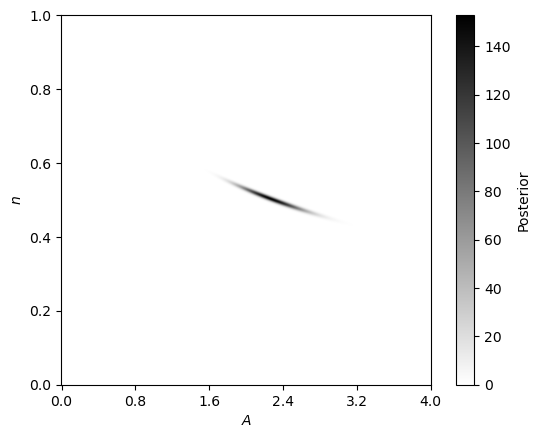

In [29]:
plt.imshow(posterior_E/np.sum(posterior_E)/dA_E/dn, cmap = "binary", origin = "lower")
plt.xticks(np.array([0, 200, 400, 600, 800, 1000]), np.array([0, 0.8, 1.6, 2.4, 3.2, 4.0]))
plt.yticks(np.array([0, 200, 400, 600, 800, 1000]), np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0]))
plt.xlabel("$A$")
plt.ylabel("$n$")

plt.colorbar(label = "Posterior")

### Question (F)

INFO:chainconsumer:Constructing meshgrid for grid results


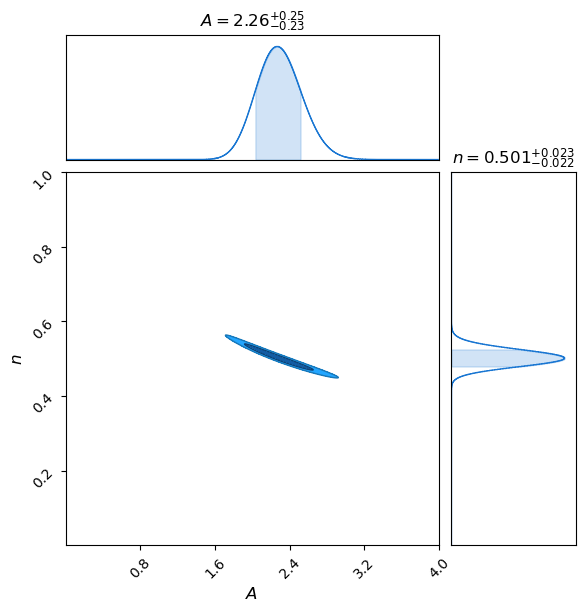

In [30]:
c = ChainConsumer()
c.add_chain([A_E, n], parameters=["$A$", "$n$"], weights=posterior_E.T, grid=True)
fig = c.plotter.plot()
fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this

INFO:chainconsumer:Constructing meshgrid for grid results


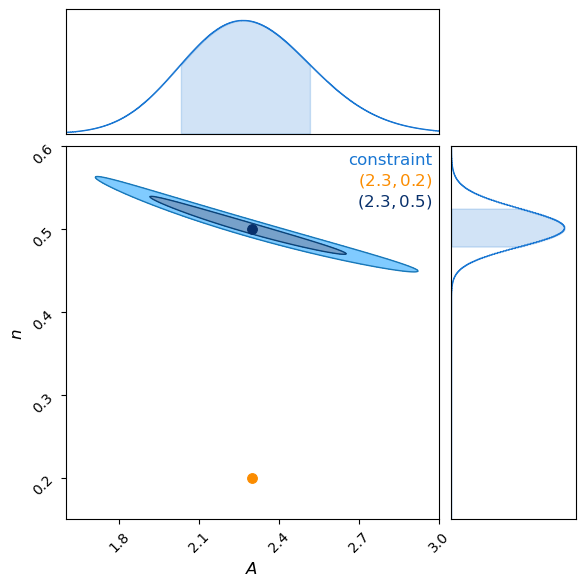

In [31]:
c = ChainConsumer()
c.add_chain([A_E, n], parameters=["$A$", "$n$"], weights=posterior_E.T, grid=True, name = "constraint")
c.add_marker(np.array([2.3, 0.2]), parameters=['$A$', '$n$'], name="$(2.3, 0.2)$", marker_style=".", marker_size=200, color="orange")
c.add_marker(np.array([2.3, 0.5]), parameters=['$A$', '$n$'], name="$(2.3, 0.5)$", marker_style=".", marker_size=200, color="#08306b")



fig = c.plotter.plot(extents = {"$A$": (1.6, 3.0), "$n$": (0.15, 0.6)})




fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this

INFO:chainconsumer:Constructing meshgrid for grid results


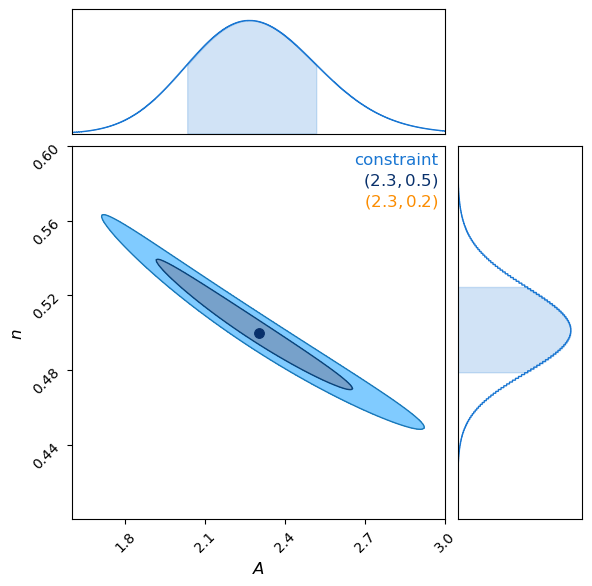

In [32]:
c = ChainConsumer()
c.add_chain([A_E, n], parameters=["$A$", "$n$"], weights=posterior_E.T, grid=True, name = "constraint")
c.add_marker(np.array([2.3, 0.5]), parameters=['$A$', '$n$'], name="$(2.3, 0.5)$", marker_style=".", marker_size=200, color="#08306b")
c.add_marker(np.array([2.3, 0.2]), parameters=['$A$', '$n$'], name="$(2.3, 0.2)$", marker_style="o", marker_size=200, color="orange")


fig = c.plotter.plot(extents = {"$A$": (1.6, 3.0), "$n$": (0.4, 0.6)})




fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this

# Problem 2



### Model (A)

The Fisher matrix for a Gaussian distribution is calculated by:


<!-- $$
F_{ij}=-\left< \frac{\partial ^2\ln p}{\partial \theta _i\partial \theta _j} \right> 
$$

So, for model A, 

$$
F_{AA}=2\left( \boldsymbol{d}-\boldsymbol{\theta }^{0.5} \right) ^TC^{-1}\left( \boldsymbol{d}-\boldsymbol{\theta }^{0.5} \right) 
$$ -->





$$
\xi \left( \theta \right) =A\cdot \theta ^{0.5}
$$


\begin{align}
    \begin{split}
        F&=\left( \frac{\partial \boldsymbol{\mu }\left( A \right)}{\partial A} \right) ^T\cdot C^{-1}\cdot \left( \frac{\partial \boldsymbol{\mu }\left( A \right)}{\partial A} \right) 
\\
&=\left( \boldsymbol{\theta }^{0.5} \right) ^T\cdot C^{-1}\cdot \left( \boldsymbol{\theta }^{0.5} \right) 
    \end{split}
\end{align}



In [77]:

F_model_A = (theta**0.5).T @ np.linalg.inv(C) @ (theta**0.5)
# F_model_A = 2*(xi-theta**0.5).T @ np.linalg.inv(C) @ (xi - theta**0.5)
# F_model_A = np.mean((theta**0.5).T @ np.linalg.inv(C) @ (theta**0.5) * posterior_A/np.sum(posterior_A)/dA)



In [85]:
print(f"The Fisher matrix value of model A is {F_model_A:.2f}")
print(np.sqrt(1/F_model_A))

The Fisher matrix value of model A is 476.67
0.04580269108491511


### Model (B)

$$
\xi \left( A,n \right) =A\cdot \theta ^n
$$


<!-- $$
F_{AA}=2\left( \boldsymbol{d}-\boldsymbol{\theta }^{0.5} \right) ^T\boldsymbol{C}^{-1}\left( \boldsymbol{d}-\boldsymbol{\theta }^{0.5} \right) 
\\
F_{An}=F_{nA}=2\left( \boldsymbol{d}-\boldsymbol{\theta }^n \right) ^T\boldsymbol{C}^{-1}\left( \boldsymbol{d}-An\boldsymbol{\theta }^{n-1} \right) 
\\
+2\left( \boldsymbol{d}-n\boldsymbol{\theta }^{n-1} \right) ^T\boldsymbol{C}^{-1}\left( \boldsymbol{d}-A\boldsymbol{\theta }^n \right) 
\\
F_{nn}=2\left( \boldsymbol{d}-An\boldsymbol{\theta }^{n-1} \right) ^T\boldsymbol{C}^{-1}\left( \boldsymbol{d}-An\boldsymbol{\theta }^{n-1} \right) 
\\
+2\left( \boldsymbol{d}-A\boldsymbol{\theta }^{n-1}-An\left( n-1 \right) \boldsymbol{\theta }^{n-2} \right) ^T\boldsymbol{C}^{-1}\left( \boldsymbol{d}-A\boldsymbol{\theta }^n \right) 
$$
 -->






$$
F_{AA}=\left( \boldsymbol{\theta }^{0.5} \right) ^T\cdot C^{-1}\cdot \left( \boldsymbol{\theta }^{0.5} \right) 
\\
F_{An}=F_{nA}=\left( \boldsymbol{\theta }^{0.5} \right) ^T\cdot C^{-1}\cdot \left( A\times 0.5\times \boldsymbol{\theta }^{-0.5} \right) 
\\
F_{nn}=\left( A\frac{1}{2}\boldsymbol{\theta }^{-0.5} \right) ^T\cdot C^{-1}\cdot \left( A\frac{1}{2}\boldsymbol{\theta }^{-0.5} \right) 
$$


In [91]:
F_model_B = np.zeros(shape=(2, 2))

A_true = 2.3
n_true = 0.5

# F_model_B[0, 0] = 2 * (xi - theta**n_true).T @ np.linalg.inv(C) @ (xi - theta**n_true)
# F_model_B[0, 1] = (2 * (xi - theta**n_true).T @ np.linalg.inv(C) @ (xi - A_true * n_true * theta**(n_true - 1)) 
#                   + 2 * (xi - n_true * theta**(n_true - 1)).T @ np.linalg.inv(C) @ (xi - A_true * theta**n_true) )
# F_model_B[1, 0] = (2 * (xi - theta**n_true).T @ np.linalg.inv(C) @ (xi - A_true * n_true * theta**(n_true - 1)) 
#                   + 2 * (xi - n_true * theta**(n_true - 1)).T @ np.linalg.inv(C) @ (xi - A_true * theta**n_true) )
# F_model_B[1, 1] = (2 * (xi - A_true * n_true*theta**(n_true-1)).T @ np.linalg.inv(C) @ (xi - A_true *n_true * theta**(n_true-1))
#                   + 2 * (xi - A_true*theta**(n_true-1) + A_true * n_true*(n_true-1)*theta**(n_true-2)).T @ np.linalg.inv(C) @ (xi - A_true * theta**(n_true))  )



F_model_B[0, 0] = (theta**n_true).T @ np.linalg.inv(C) @ (theta**n_true)
F_model_B[0, 1] = (theta**n_true).T @ np.linalg.inv(C) @ (A_true  * theta**(n_true) * np.log(theta))
F_model_B[1, 0] = (theta**n_true).T @ np.linalg.inv(C) @ (A_true  * theta**(n_true) * np.log(theta))
F_model_B[1, 1] = (A_true * theta **(n_true )* np.log(theta) ).T @ np.linalg.inv(C) @ (A_true * theta **(n_true) * np.log(theta))



# F_model_B[0, 0] = np.mean((theta**0.5).T @ np.linalg.inv(C) @ (theta**0.5) * posterior_A/np.sum(posterior_A)/dA)

# a = np.ones_like(posterior_E)
# for i, n_i in enumerate(n):
#     for j, a_e in enumerate(A_E):
#         a[i, j] = 1 / np.sqrt(2 * np.pi * np.linalg.det(C)) * np.exp(-0.5 * (xi - a_e * theta **n_i).T @ np.linalg.inv(C) @ (xi - a_e * theta ** n_i)) * 0.25 * posterior_E[i, j]/np.sum(posterior_E)/dA_E/dn


        
# b = 

# F_model_B[0, 1] = (2 * (xi - theta**n_true).T @ np.linalg.inv(C) @ (xi - A_true * n_true * theta**(n_true - 1)) 
#                   + 2 * (xi - n_true * theta**(n_true - 1)).T @ np.linalg.inv(C) @ (xi - A_true * theta**n_true) )
# F_model_B[1, 0] = (2 * (xi - theta**n_true).T @ np.linalg.inv(C) @ (xi - A_true * n_true * theta**(n_true - 1)) 
#                   + 2 * (xi - n_true * theta**(n_true - 1)).T @ np.linalg.inv(C) @ (xi - A_true * theta**n_true) )
# F_model_B[1, 1] = (2 * (xi - A_true * n_true*theta**(n_true-1)).T @ np.linalg.inv(C) @ (xi - A_true *n_true * theta**(n_true-1))
#                   + 2 * (xi - A_true*theta**(n_true-1) + A_true * n_true*(n_true-1)*theta**(n_true-2)).T @ np.linalg.inv(C) @ (xi - A_true * theta**(n_true))  )




In [92]:
print("The Fisher Matrix for Model B is \n ", F_model_B)


The Fisher Matrix for Model B is 
  [[  476.6702083   5003.22389089]
 [ 5003.22389089 54479.66652262]]


In [100]:
print(np.where(posterior_E==np.max(posterior_E)))
print()

(array([504]), array([565]))
0.5650000000000001


INFO:chainconsumer:Constructing meshgrid for grid results


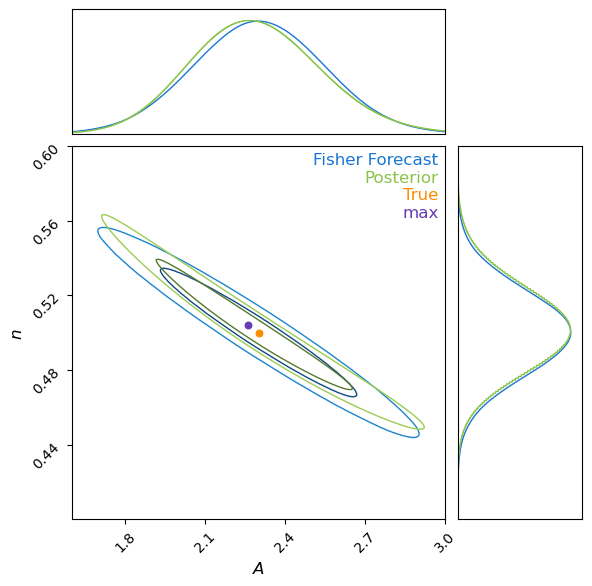

In [122]:
c = ChainConsumer()
c.add_covariance(np.array([A_true, n_true]), np.linalg.inv(F_model_B), parameters=['$A$', '$n$'], name="Fisher Forecast")
c.add_chain([A_E, n], parameters=["$A$", "$n$"], weights=posterior_E.T, grid=True, name = "Posterior")
c.add_marker(np.array([A_true, n_true]), parameters=['$A$', '$n$'], name="True", marker_style=".", marker_size=100, color="orange")
c.add_marker(np.array([A_E[565], n[504]]), parameters=['$A$', '$n$'], name="max", marker_style=".", marker_size=100, color="purple")
c.configure(usetex=False, serif=False)
fig = c.plotter.plot(extents = {"$A$": (1.6, 3.0), "$n$": (0.4, 0.6)}, )
# fig = c.plotter.plot()
fig.set_size_inches(3 + fig.get_size_inches())


Does this mean that the estimator is biased?

# Problem 3

If it is a Gaussian PDF, we could use ***Chi-Square*** to measure the goodness of fit

$$
\chi ^2\left( \boldsymbol{d}|\boldsymbol{\pi } \right) \equiv \left( \boldsymbol{d}-\boldsymbol{\mu }\left[ \boldsymbol{\pi } \right] \right) ^TC\left[ \boldsymbol{\pi } \right] ^{-1}\left( \boldsymbol{d}-\boldsymbol{\mu }\left[ \boldsymbol{\pi } \right] \right) 
$$

The Chi-Square PDF:
$$
p\left( \chi ^2 \right) =\left( \chi ^2 \right) ^{\frac{N_{data}}{2}-1}\frac{\exp \left( -\frac{1}{2}\chi ^2 \right)}{2^{N_{data}/2}\Gamma \left( N_{data}/2 \right)}
$$

If $p\left( \hat{\chi}^2>\chi ^2\left( \boldsymbol{d}|\boldsymbol{\pi } \right) \right) $ is very small, we could say that it does not provide a good fit




##### Gamma distribution


$$
f\left( x;\alpha ,\beta \right) =\frac{x^{\alpha -1}e^{-\beta x}\beta ^{\alpha}}{\Gamma \left( \alpha \right)}
$$
where $\alpha$ is the shape parameter, $\theta = \frac{1}{\beta}$ is the scale parameter

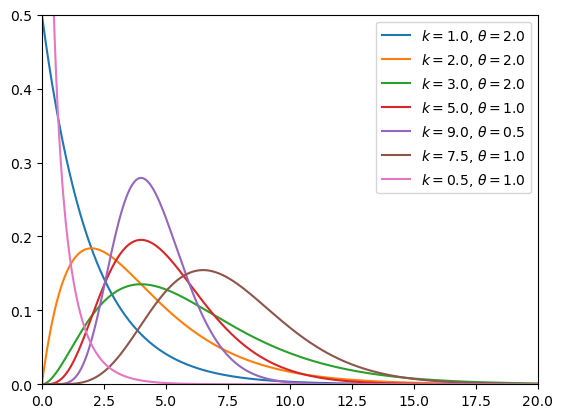

In [38]:
x = np.linspace(0, 20, 1001)

k = np.array([1, 2, 3, 5, 9, 7.5, 0.5])
theta_gamma = np.array([2, 2, 2, 1, 0.5, 1, 1])

for i in range(len(k)):
    plt.plot(x, gamma.pdf(x, a=k[i], scale = theta_gamma[i]), label=fr"$k={k[i]}$, $ \theta={theta_gamma[i]}$")

    
plt.xlim(0, 20)
plt.ylim(0, 0.5)
plt.legend()
    
# y = gamma.pdf(x, a = 9, scale = 0.5)

# plt.plot(x, y)

In [ ]:
# prior value effect